<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA and LSA. The following information should be reported:

(1) Features (top n-gram phrases) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


In [44]:
# Write your code here
#part1

import nltk
from nltk.util import ngrams



In [45]:
df = pd.read_csv('/content/sentimentdata02 .csv')
df

,document_id,clean_text,sentiment
0,0,africanarch year ago today unarm trayvon marti...,Negative
1,1,africanarch year ago today unarm trayvon marti...,Negative
2,2,learn concret step spiritu leader integr anti ...,Neutral
3,3,angelicaross found watchallblk app samsung tv ...,Positive
4,4,africanarch year ago today unarm trayvon marti...,Negative
...,...,...,...
9995,9995,deccanherald a juri found three former minneap...,Positive
9996,9996,alima the truste gem auction fiduciari duti kk...,Neutral
9997,9997,marr edward i know war blacklivesmatt plea fre...,Neutral
9998,9998,oldmainbel ding ding ding ding amp ding ding d...,Neutral


In [46]:
clean_data = open('/content/sentimentdata02 .csv', "r")


In [47]:
#create 10 gram


Tengrams = ngrams(clean_data.read().split(), 10)
TengramwithFrequency = nltk.FreqDist(Tengrams)
TengramwithFrequency

FreqDist({('document_id,clean_text,sentiment',
           '0,africanarch',
           'year',
           'ago',
           'today',
           'unarm',
           'trayvon',
           'martin',
           'shot',
           'dead'): 1,
          ('0,africanarch',
           'year',
           'ago',
           'today',
           'unarm',
           'trayvon',
           'martin',
           'shot',
           'dead',
           'georg'): 1,
          ('year',
           'ago',
           'today',
           'unarm',
           'trayvon',
           'martin',
           'shot',
           'dead',
           'georg',
           'zimmerman'): 1502,
          ('ago',
           'today',
           'unarm',
           'trayvon',
           'martin',
           'shot',
           'dead',
           'georg',
           'zimmerman',
           'fuel'): 1503,
          ('today',
           'unarm',
           'trayvon',
           'martin',
           'shot',
           'dead',
           'ge

In [48]:
#part2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")
pd.options.display.max_columns = 999

In [50]:
import nltk; nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [51]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
import matplotlib.pyplot as plt
%matplotlib inline
# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

     |████████████████████████████████| 1.7 MB 13.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=520fe132f113e0fa23b905038b203ccc37c49a980ee1be1073b4aed5eea193ac
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [52]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [53]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(df['clean_text']))

print(data_words[:])

[['africanarch', 'year', 'ago', 'today', 'unarm', 'trayvon', 'martin', 'shot', 'dead', 'georg', 'zimmerman', 'fuel', 'movement', 'blac'], ['africanarch', 'year', 'ago', 'today', 'unarm', 'trayvon', 'martin', 'shot', 'dead', 'georg', 'zimmerman', 'fuel', 'movement', 'blac'], ['learn', 'concret', 'step', 'spiritu', 'leader', 'integr', 'anti', 'racism', 'ministri', 'spiritu', 'leadership', 'commun', 'click', 'info', 'http', 'co', 'jofotswpu', 'thisisamerica', 'racialjustic', 'racisminamerica', 'blacklivesmatt', 'http', 'co', 'yfbwhrul'], ['angelicaross', 'found', 'watchallblk', 'app', 'samsung', 'tv', 'about', 'watch', 'right', 'beyondedbuck', 'blacklivesmatt'], ['africanarch', 'year', 'ago', 'today', 'unarm', 'trayvon', 'martin', 'shot', 'dead', 'georg', 'zimmerman', 'fuel', 'movement', 'blac'], ['south', 'africa', 'gem', 'audac', 'repeat', 'realiti', 'apartheid', 'discrimin', 'http', 'co', 'rsfvfielij', 'cmscaresu', 'thedpsa', 'healthza', 'tourism', 'gov', 'za', 'qm', 'ir', 'constitut',

In [55]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [54]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['africanarch', 'year', 'ago', 'today', 'unarm', 'trayvon', 'martin', 'shot', 'dead', 'georg', 'zimmerman', 'fuel', 'movement', 'blac']


In [56]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['africanarch', 'year', 'ago', 'today', 'shoot', 'dead', 'movement']]


In [57]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]]


In [58]:
id2word[5]

'today'

In [59]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('africanarch', 1),
  ('ago', 1),
  ('dead', 1),
  ('movement', 1),
  ('shoot', 1),
  ('today', 1),
  ('year', 1)]]

In [60]:
# Build LDA model
Num_Topics = 10
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics= Num_Topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [61]:
# Print the Keyword in the topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.123*"steal" + 0.122*"break" + 0.122*"gem" + 0.122*"broad" + '
  '0.122*"daylight" + 0.095*"time" + 0.041*"cmscaresu" + 0.035*"number" + '
  '0.034*"presidencyza" + 0.015*"pac"'),
 (1,
  '0.164*"place" + 0.048*"univer" + 0.038*"reach" + 0.029*"spread" + '
  '0.028*"war" + 0.026*"never" + 0.023*"ignor" + 0.021*"life" + 0.020*"goal" + '
  '0.018*"lose"'),
 (2,
  '0.258*"auction_fiduciari" + 0.167*"kkk" + 0.028*"color" + 0.022*"rsf" + '
  '0.020*"would" + 0.014*"die" + 0.014*"stand" + 0.011*"vote" + 0.010*"gc" + '
  '0.010*"formula"'),
 (3,
  '0.350*"co" + 0.183*"blacklivesmatt" + 0.121*"doctor" + 0.121*"http" + '
  '0.012*"peac" + 0.010*"blm" + 0.007*"join" + 0.007*"equal" + '
  '0.006*"sanghisunit" + 0.006*"rcujewv"'),
 (4,
  '0.066*"live" + 0.062*"blacklivesmatt" + 0.053*"say" + 0.037*"oppress" + '
  '0.036*"matter" + 0.032*"get" + 0.031*"woman" + 0.027*"world" + 0.020*"talk" '
  '+ 0.017*"respon"'),
 (5,
  '0.058*"blacklivesmatt" + 0.054*"right" + 0.053*"racist" + 0.049*"make

In [62]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.6953642372872935

Coherence Score:  0.5238158744821705


In [ ]:
!pip install datascience
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install tensorflow

In [64]:
# Visualize the topics
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.051964  0.063734       1        1  20.301553
3     -0.122698 -0.237731       2        1  12.801023
0      0.425898 -0.178136       3        1  12.535809
6      0.078456  0.270434       4        1  11.720082
7     -0.006958  0.198158       5        1  10.568194
8     -0.100790 -0.049499       6        1   6.714661
4     -0.125313 -0.094197       7        1   6.699972
1     -0.008047  0.068925       8        1   6.319555
2      0.035479  0.054919       9        1   6.169716
5     -0.124063 -0.096606      10        1   6.169435, topic_info=                   Term         Freq        Total Category  logprob  loglift
7                    co  2394.000000  2394.000000  Default  30.0000  30.0000
34                black  2636.000000  2636.000000  Default  29.0000  29.0000
31                peopl  1683.000000  1683.000000  Default  28.0000  28.0000
1660  auction_fiduciari   851.000000   851.000000  Default  27.0000  27.0000
15       blacklivesmatt  1777.000000  1777.000000  Default  26.0000  26.0000
...                 ...          ...          ...      ...      ...      ...
843                home    21.464671    22.980028  Topic10  -5.0331   2.7173
3711           baltimor    22.593941    24.190424  Topic10  -4.9818   2.7173
1075               true    19.454291    20.969515  Topic10  -5.1314   2.7106
704                real    18.441833    19.957162  Topic10  -5.1849   2.7066
15       blacklivesmatt   190.515600  1777.975263  Topic10  -2.8498   0.5521

[355 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
379       1  0.023318      account
379       4  0.956042      account
138       1  0.013282      african
138       6  0.982898      african
0         1  0.986478  africanarch
...     ...       ...          ...
6         1  0.998975         year
1610      1  0.027244          yet
1610      7  0.953549          yet
1648      1  0.055320    yrntlmunc
1648      3  0.940447    yrntlmunc

[646 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 4, 1, 7, 8, 9, 5, 2, 3, 6])

In [ ]:
#part2
words = []   #building document-term matrix
from nltk.tokenize import RegexpTokenizer
from gensim import corpora,models
tokenizer = RegexpTokenizer(r'\w+')
for x in pd.Series(df['CleanText']):
  a = tokenizer.tokenize(x)
  words.append(a)
dictionary = corpora.Dictionary(words)
corpus = [dictionary.doc2bow(word) for word in words]

In [ ]:


import gensim  #LDA model
model = gensim.models.ldamodel.LdaModel(corpus, num_topics = 10, id2word = dictionary,passes = 20)

print(model.print_topics(num_topics = 10, num_words = 5))

[(0, '0.085*"alima" + 0.072*"http" + 0.068*"co" + 0.058*"gem" + 0.046*"medicalaidracialprofil"'), (1, '0.040*"b" + 0.038*"they" + 0.038*"around" + 0.037*"busi" + 0.037*"hide"'), (2, '0.039*"http" + 0.036*"blacklivesmatt" + 0.029*"co" + 0.027*"place" + 0.014*"mlk"'), (3, '0.070*"trayvon" + 0.069*"martin" + 0.067*"today" + 0.064*"year" + 0.062*"ago"'), (4, '0.033*"blacklivesmatt" + 0.028*"i" + 0.017*"get" + 0.015*"help" + 0.014*"http"'), (5, '0.075*"even" + 0.058*"peopl" + 0.049*"black" + 0.046*"racism" + 0.045*"ukrain"'), (6, '0.031*"peopl" + 0.030*"blacklivesmatt" + 0.021*"doctor" + 0.018*"black" + 0.014*"white"'), (7, '0.083*"co" + 0.082*"http" + 0.082*"blacklivesmatt" + 0.053*"black" + 0.031*"blackhistorymonth"'), (8, '0.049*"black" + 0.019*"blacklivesmatt" + 0.015*"also" + 0.014*"u" + 0.012*"beyond"'), (9, '0.037*"ding" + 0.035*"blacklivesmatt" + 0.020*"ukrain" + 0.019*"http" + 0.019*"co"')]


In [ ]:
#part3
#Topic 1 is about Steal in black people. Topic 2 is about life and goal on black people. Topic 3
# is about auction fiduciary. Topic 4 is about peace in black people. Topic 5 is about Women and live in black people. 
# Topic 6 is about BlackLivesMatter. Topic 7 is about support and love in black people. Topic 8 is about writers in black people. 
# Topic 9 is about compass injustice, and topic 10 is about crime in black people

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

Part1:

To extract features from my data corpus, I selected the TF-IDF vectorizer since its main focus is on the word’s frequency. The text vectorizer Term frequency-inverse document frequency converts the text into an useable vector. Term Frequency (TF) and Document Frequency (DF) are combined in this formula (DF). The term frequency refers to the number of times a term appears in a document. Term frequency displays each text in the data as a matrix, with rows representing the number of documents and columns representing the number of distinct terms across all documents. The number of documents that include a specific term is known as document frequency. The frequency of documents reflects how common a term is. The weight of a term is determined by the inverse document frequency (IDF), which seeks to minimize the weight of a term if its occurrences are dispersed throughout all documents. Also, TF-IDF vectorizer explains the words’ importance. Thus, I think this is great features and add valuable information related to each class an category. So, it will help to improve the accuracy of a model.  



In [3]:
# Write your code here

import pandas as pd
Data=pd.read_csv('/content/sentimentdata02 .csv')
print(Data.shape)



(10000, 3)


In [4]:

Data.head()

,document_id,clean_text,sentiment
0,0,africanarch year ago today unarm trayvon marti...,Negative
1,1,africanarch year ago today unarm trayvon marti...,Negative
2,2,learn concret step spiritu leader integr anti ...,Neutral
3,3,angelicaross found watchallblk app samsung tv ...,Positive
4,4,africanarch year ago today unarm trayvon marti...,Negative


In [5]:
Data['sentiment'].value_counts()

Neutral     4096
Negative    3869
Positive    2035
Name: sentiment, dtype: int64

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   document_id  10000 non-null  int64 
 1   clean_text   10000 non-null  object
 2   sentiment    10000 non-null  object
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


In [65]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Data["sentiment"] = le.fit_transform(Data["sentiment"])

Data.head()

,document_id,clean_text,sentiment
0,0,africanarch year ago today unarm trayvon marti...,0
1,1,africanarch year ago today unarm trayvon marti...,0
2,2,learn concret step spiritu leader integr anti ...,1
3,3,angelicaross found watchallblk app samsung tv ...,2
4,4,africanarch year ago today unarm trayvon marti...,0


In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
TfidfVectorizer = TfidfVectorizer()
X = TfidfVectorizer.fit_transform(Data['clean_text'].apply(lambda x: np.str_(x)))
Y = Data['sentiment']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state = 202)

print ("x_rain", x_train.shape)
print ("x_est", x_test.shape)
print ("y_train", y_train.shape)
print ("y_test", y_test.shape)

x_rain (8000, 10760)
x_est (2000, 10760)
y_train (8000,)
y_test (2000,)


In [71]:
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()
NB.fit(x_train,y_train)
PredictionsNB = NB.predict(x_test)
PredictionsNB

array([0, 1, 1, ..., 2, 0, 0])

In [74]:
from sklearn.metrics import classification_report

cr_naive = classification_report(y_test, PredictionsNB)
print("Report: ", "\n", "\n",cr_naive)

Report:  
 
               precision    recall  f1-score   support

           0       0.94      0.88      0.91       779
           1       0.85      0.96      0.90       820
           2       0.91      0.79      0.84       401

    accuracy                           0.89      2000
   macro avg       0.90      0.87      0.88      2000
weighted avg       0.90      0.89      0.89      2000



In [80]:
from sklearn.model_selection import cross_val_score
accuracyNB = cross_val_score(estimator = NB, X = x_train, y = y_train, cv = 10)

print(f"Accuracy :  {round(accuracyNB.mean()*100)}%")

Accuracy :  90%


In [82]:
#SVM
from sklearn import svm

SClf = svm.SVC(kernel='linear')
SClf.fit(x_train, y_train)
PredictionsSvm = SClf.predict(x_test)
PredictionsSvm

array([1, 1, 1, ..., 2, 0, 0])

In [83]:
CrSvm = classification_report(y_test, PredictionsSvm)
print("report: ", "\n", "\n",CrSvm)

report:  
 
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       779
           1       0.92      0.99      0.96       820
           2       0.97      0.88      0.92       401

    accuracy                           0.95      2000
   macro avg       0.96      0.94      0.95      2000
weighted avg       0.96      0.95      0.95      2000



In [84]:
from sklearn.model_selection import cross_val_score
AccuracySvm = cross_val_score(estimator = SClf, X = x_train, y = y_train, cv = 10)

print(f"Accuracy :  {round(AccuracySvm.mean()*100)}%")

Accuracy :  95%


Part3

To do sentiment analysis, I used two algorithms, which are Naïve Bayes and SVM. The accuracy factor is used to compare these algorithms. SVM is better than Naïve Bayes regarding accuracy factor. SVM’s accuracy is 95% while Naïve Bayes's accuracy is 90%. Therefore, I focused on SVM’s results. In SVM results, f1-score for negative tweets is 0.97 while for neutral and positive tweets are 0.96 and 0.92. Also, precision values are 0.99, 0.92, and 0.97 for negative, neutral, and positive tweets, respectively. 

# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download here: https://github.com/unt-iialab/info5731-spring2022/blob/main/assignments/assignment4-question3-data.zip. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [284]:
# Write your code here
import pandas as pd
DfTrain = pd.read_csv("/content/train.csv")

DfTrain

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [285]:
DfTest = pd.read_csv("/content/test.csv")
DfTest

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

In [286]:
DfTrain.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [287]:
DfTest.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [288]:
DfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [289]:
DfTrain.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [291]:
DfTest.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

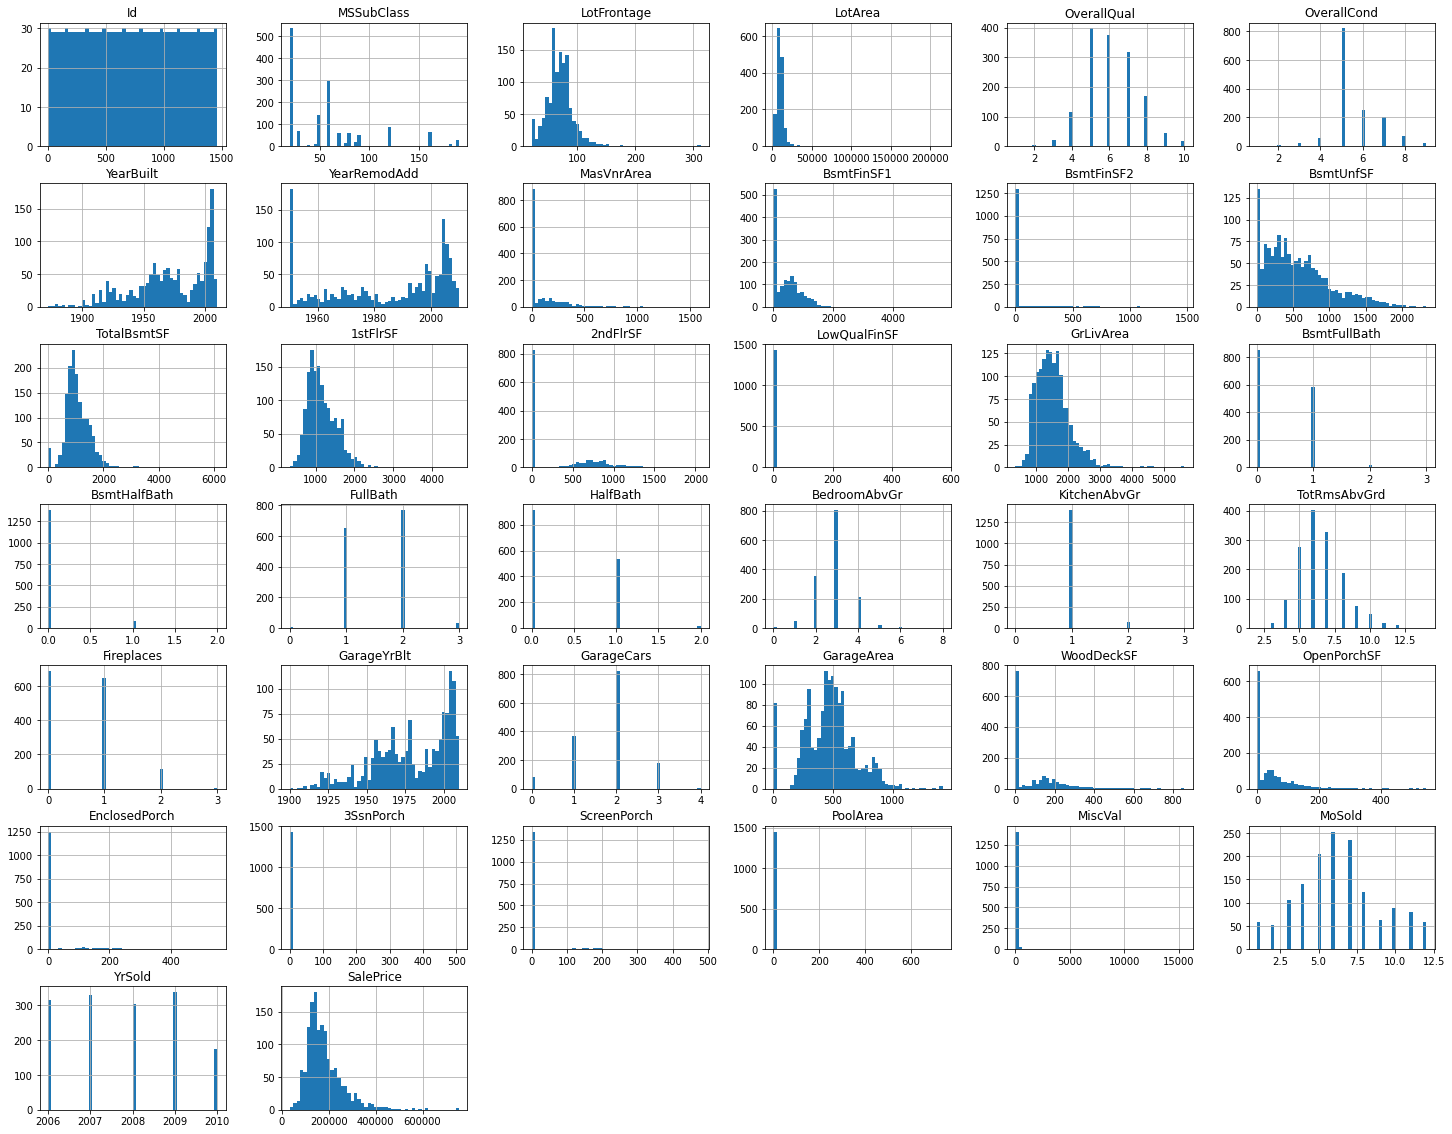

In [292]:
DfTrain.hist(bins=50, figsize=(25,20))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8d049bc090>,
      dtype=object)

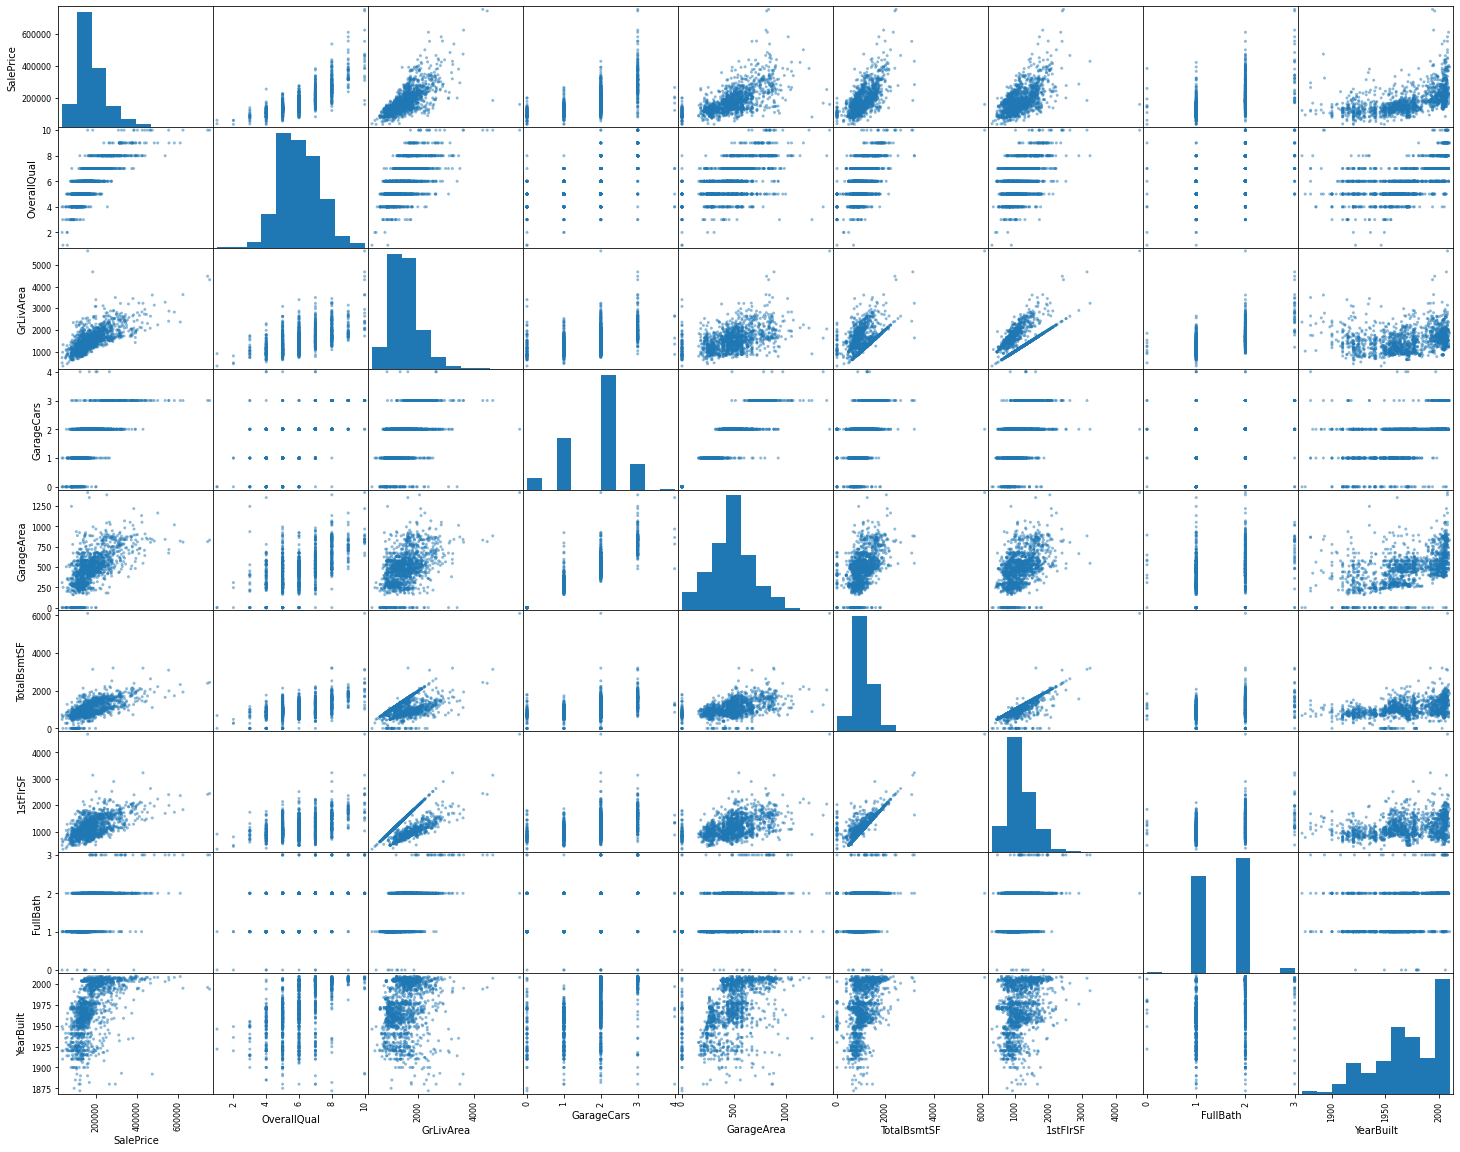

In [293]:
from pandas.plotting import scatter_matrix
attributes = ["SalePrice", "OverallQual", "GrLivArea", "GarageCars", "GarageArea","TotalBsmtSF","1stFlrSF", "FullBath","YearBuilt" ]
scatter_matrix(DfTrain[attributes], figsize=(25, 20))

In [294]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [295]:
DfTrain = DfTrain.select_dtypes(include=['number']).interpolate().dropna()
DfTest = DfTest.select_dtypes(include=['number']).interpolate().dropna()

In [296]:
import numpy as np

In [297]:
XTrainDataset = DfTrain.drop(['SalePrice','Id'], axis=1)
YTrainDataset = np.log(DfTrain.SalePrice)

In [298]:
x_train, x_test, y_train, y_test = train_test_split(XTrainDataset,YTrainDataset,random_state = 21, test_size=0.2)


Regression = LinearRegression()
Regression.fit(x_train,y_train)

YPred = Regression.predict(x_test)

In [299]:
print('R squared": %.4f' % Regression.score(x_test, y_test))

R squared": 0.8493


In [300]:
import numpy as np
from sklearn.metrics import mean_squared_error
Mean = mean_squared_error(np.exp(YPred), y_test)
MeanSqrt = np.sqrt(Mean)
print(MeanSqrt)

195747.2801595339


In [301]:
FinalResult = {"prediction":np.exp(YPred),"real price":np.exp(y_test)}
DfVal = pd.DataFrame(FinalResult)
DfVal["difference"] = round(abs((DfVal["prediction"] - DfVal["real price"]) / DfVal["real price"]) * 100,2)
DfVal

,prediction,real price,difference
880,156677.762126,157000.0,0.21
605,229973.921577,205000.0,12.18
1166,245358.948864,245350.0,0.00
216,218109.586021,210000.0,3.86
970,86909.329260,135000.0,35.62
...,...,...,...
218,231419.797074,311500.0,25.71
1228,311321.804719,367294.0,15.24
1007,93234.996099,88000.0,5.95
575,109041.447359,118500.0,7.98
